In [11]:
import import_ipynb
import preprocess_model as pre

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam

In [13]:

df = pre.df_fnn

In [14]:
# pre.X_col = ['School enrollment, primary', 'School enrollment, tertiary', 'Primary completion rate', 'Year']
# pre.Country = ['pre.Country']
# y_target = 'Literacy rate'

# # Drop rows with missing target values
# df.dropna(subset=[y_target], inplace=True)

In [15]:
# # Split the data into training, validation, and test sets
# pre.X_train, pre.X_temp, pre.y_train, pre.y_temp = train_test_split(df[pre.X_col + pre.Country], df[y_target], test_size=0.4, random_state=42)
# pre.X_val, pre.X_test, pre.y_val, pre.y_test = train_test_split(pre.X_temp, pre.y_temp, test_size=0.5, random_state=42)

# print("Shapes after splitting:")
# print("pre.X_train:", pre.X_train.shape, "pre.y_train:", pre.y_train.shape)
# print("pre.X_val:", pre.X_val.shape, "pre.y_val:", pre.y_val.shape)
# print("pre.X_test:", pre.X_test.shape, "pre.y_test:", pre.y_test.shape)


In [16]:

# # Standardize the numerical features
# pre.scaler = StandardScaler()
# pre.X_train[pre.X_col] = pre.scaler.fit_transform(pre.X_train[pre.X_col])
# pre.X_val[pre.X_col] = pre.scaler.transform(pre.X_val[pre.X_col])
# pre.X_test[pre.X_col] = pre.scaler.transform(pre.X_test[pre.X_col])


In [17]:

# # Preprocess categorical features
# label_encoders = {}
# for country in pre.Country:
#     le = LabelEncoder()
#     pre.X_train[country] = le.fit_transform(pre.X_train[country])
#     pre.X_val[country] = le.transform(pre.X_val[country])
#     pre.X_test[country] = le.transform(pre.X_test[country])
#     label_encoders[country] = le


In [18]:

# Define the learning rate
learning_rate = 0.0001  


Epoch 1/200
13/13 [==============================] - 2s 37ms/step - loss: 9460.0020 - val_loss: 9267.5264
Epoch 2/200
13/13 [==============================] - 0s 13ms/step - loss: 8742.5010 - val_loss: 7800.3057
Epoch 3/200
13/13 [==============================] - 0s 11ms/step - loss: 5999.9189 - val_loss: 3281.7302
Epoch 4/200
13/13 [==============================] - 0s 9ms/step - loss: 2044.2574 - val_loss: 1183.5094
Epoch 5/200
13/13 [==============================] - 0s 8ms/step - loss: 1189.4692 - val_loss: 726.7706
Epoch 6/200
13/13 [==============================] - 0s 8ms/step - loss: 700.2114 - val_loss: 371.5425
Epoch 7/200
13/13 [==============================] - 0s 9ms/step - loss: 511.0184 - val_loss: 267.5388
Epoch 8/200
13/13 [==============================] - 0s 9ms/step - loss: 409.7186 - val_loss: 199.3407
Epoch 9/200
13/13 [==============================] - 0s 8ms/step - loss: 371.4077 - val_loss: 157.1827
Epoch 10/200
13/13 [==============================] - 0s 8ms/

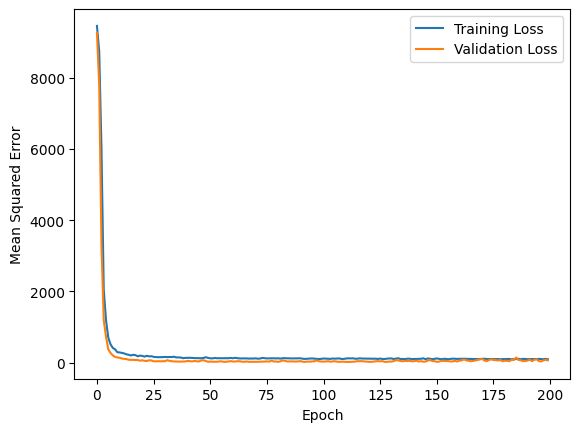

In [19]:

# Define the model
input_layers = []
embedding_layers = []

for country in pre.Country:
    input_layer = Input(shape=(1,), name=country)
    embedding_layer = Embedding(input_dim=len(df[country].unique()), output_dim=10)(input_layer)
    flatten_layer = Flatten()(embedding_layer)
    input_layers.append(input_layer)
    embedding_layers.append(flatten_layer)

input = Input(shape=(len(pre.X_col),), name='input')
embedding_layers.append(input)

# Concatenate all input layers
concatenated = Concatenate()(embedding_layers)

# Fully connected layers with dropout for regularization
x = Dense(256, activation='relu')(concatenated)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu')(x)
output_layer = Dense(1, activation='linear', name='output')(x)

# Model
model = Model(inputs=input_layers + [input], outputs=output_layer)

# Compile the model with Mean Squared Error loss and the specified learning rate
model.compile(optimizer=Adam(lr=learning_rate), loss='mean_squared_error') #soft-max reg

# Train the model for more epochs
history = model.fit([pre.X_train[country] for country in pre.Country] + [pre.X_train[pre.X_col]],
                    pre.y_train, epochs=200, batch_size=64,
                    validation_data=([pre.X_val[country] for country in pre.Country] + [pre.X_val[pre.X_col]], pre.y_val),
                    verbose=1)

# Evaluate the model on the test set
test_loss = model.evaluate([pre.X_test[country] for country in pre.Country] + [pre.X_test[pre.X_col]], pre.y_test)
print(f'Test Loss: {test_loss}')

# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [20]:
# # Make predictions
# test = ['School enrollment, primary', 'School enrollment, tertiary', 'Primary completion rate', 'Year', 'Country']
# # print(df[test])
# new_data = pd.DataFrame({
#     'School enrollment, primary': [100.911263,100.911262512207],
#     'School enrollment, tertiary': [28.845509  ,28.8455085754395],
#     'Primary completion rate': [96.636715, 96.63671493530276],
#     'Year': [2023,2023],
#     'Country': ["Afghanistan", "Japan"],
# })

# # 100.911262512207,28.8455085754395,96.63671493530276
# # Preprocess the new data similar to the training data
# # Standardize numerical features
# new_data[pre.X_col] = pre.scaler.transform(new_data[pre.X_col])

# # Preprocess
# for country in pre.Country:
#     new_data[country] = pre.label_encoders[country].transform(new_data[country])

# # # Make predictions on the new data
# predictions_future = model.predict([new_data[country] for country in pre.Country] + [new_data[pre.X_col]])
# print(predictions_future)

predictions = model.predict([pre.X_test[country] for country in pre.Country] + [pre.X_test[pre.X_col]])
# print(pre.y_test)
print(predictions)
# import seaborn as sns

# sns.kdeplot(pre.y_test, label='Actual', shade=True)
# sns.kdeplot(predictions.flatten(), label='Predicted', shade=True)
# plt.xlabel('Literacy rate')
# plt.ylabel('Literacy rate')
# plt.title('Distribution of Actual vs. Predicted Literacy rate')
# plt.show()
# residuals = pre.y_test - predictions.flatten()

# plt.scatter(pre.y_test, residuals)
# plt.axhline(y=0, color='red', linestyle='--')
# plt.xlabel('Actual Literacy rate')
# plt.ylabel('Residuals')
# plt.title('Residual Plot')
# plt.show()


mse = mean_squared_error(pre.y_test, predictions)
mae = mean_absolute_error(pre.y_test, predictions)

r2 = r2_score(pre.y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


9/9 [==============================] - 0s 2ms/step
[[91.10643 ]
 [92.41494 ]
 [92.15132 ]
 [91.566895]
 [95.477554]
 [91.58679 ]
 [95.13567 ]
 [91.67036 ]
 [93.29535 ]
 [91.69927 ]
 [91.725365]
 [93.84148 ]
 [91.732704]
 [91.1757  ]
 [93.94315 ]
 [91.12617 ]
 [91.396126]
 [94.712906]
 [92.591805]
 [90.996025]
 [91.77604 ]
 [91.404755]
 [91.29482 ]
 [93.81597 ]
 [92.778114]
 [89.65711 ]
 [91.428474]
 [91.08187 ]
 [92.22787 ]
 [91.11358 ]
 [92.157425]
 [92.83389 ]
 [93.24508 ]
 [90.711555]
 [92.606926]
 [91.49929 ]
 [93.24112 ]
 [92.360466]
 [92.50413 ]
 [90.31458 ]
 [92.078545]
 [92.087944]
 [92.76613 ]
 [93.134575]
 [91.15359 ]
 [90.44556 ]
 [92.59797 ]
 [94.00146 ]
 [92.545654]
 [87.201805]
 [93.863335]
 [88.02201 ]
 [90.72016 ]
 [91.55332 ]
 [91.61874 ]
 [92.51218 ]
 [92.05049 ]
 [91.50609 ]
 [88.08423 ]
 [91.038574]
 [90.7441  ]
 [90.89702 ]
 [91.977104]
 [86.601685]
 [90.18273 ]
 [90.24276 ]
 [89.427605]
 [90.573524]
 [90.38056 ]
 [92.0481  ]
 [91.83904 ]
 [92.01536 ]
 [92.25207 ]
